# Purpose

The purpose of this Notebook is to show how my polynomial interpolation algorithm works.  I'd like people to go through this document and see if this algorithm is novel or not as I don't have a rigerous background in finite differences.

# Running the code to solve for coeffecients of a polynomial of degree 3

The SsrsteomTree Object takes in an output list of a polynomial you wish to resolve the coeffecients of as well
as well as the starting x value and a delta x value.
The case below describes the following:

| x  | p(x)   |
| -- | -------|
| 1.9| 68.035 |
| 2.2| 94.000 |
|2.5 | 126.625|
|2.8 | 166.720|

## This is to show what the data above look

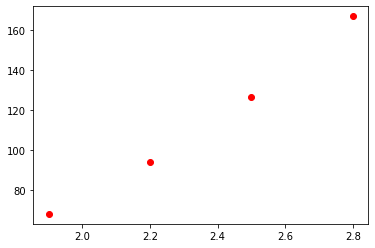

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter([1.9,2.2,2.5,2.8], [68.035,94.000,126.625,166.720], color='red');

In [2]:
import sys  
sys.path.insert(0, 'C:\\Users\\jmose\\eclipse-workspace\\modern_ssrsteom\\ssrsteom_modern')

from ssrsteom import SsrsteomTree
from decimal import Decimal
ssrsteom_tree = SsrsteomTree([Decimal('68.035'),Decimal('94.000'),Decimal('126.625'),Decimal('166.720')], Decimal('1.9'),Decimal('.3'))
ssrsteom_tree.solve(ssrsteom_tree)
ssrsteom_tree.coeffecientList

[Decimal('5'), Decimal('4.0'), Decimal('7.00'), Decimal('6.000')]

### This is representative of the following polynomial.

$ p(x) = 5x^3 + 4x^2 + 7x + 6 $

If we plug the following x values into the polynomial above (1.9, 2.2, 2.5 and 2.8), you'll see the same output data we started with which was 68.035, 94, 126.625 and 166.720.

In [26]:
from decimal import Decimal
p = lambda x: 5*x**3 + 4*x**2 + 7*x + 6

print(p(Decimal('1.9')))
print(p(Decimal('2.2')))
print(p(Decimal('2.5')))
print(p(Decimal('2.8')))


68.035
94.000
126.625
166.720


Here's plotting the initial scatter plot and the polynomial that hits those points.

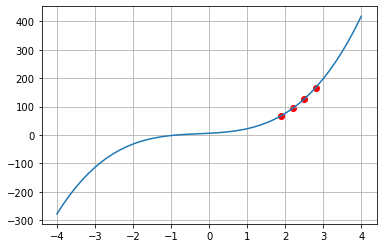

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
xs = np.linspace(-4,4)
p = lambda x: 5*x**3 + 4*x**2 + 7*x + 6
px = [p(x) for x in xs]
    
plt.plot(xs, px)
plt.scatter([1.9,2.2,2.5,2.8], [68.035,94.000,126.625,166.720], color='red');
plt.grid()
plt.show()


# Patterns I found to discover/develop this algorithm

When you create deviation tree or ssrsteom tree with a degree 3 monomial withough a coeffecient you get the following results.

$ p(x) = x^3 $

In [108]:
from ssrsteom import SsrsteomTree
from decimal import Decimal
p = lambda x: x**3
ssrsteom_tree = SsrsteomTree([p(x) for x in range(1,8)],1,1)
for differenceList in ssrsteom_tree.ssrsteomList:
        print(list(map(int,differenceList)))

[1, 8, 27, 64, 125, 216, 343]
[7, 19, 37, 61, 91, 127]
[12, 18, 24, 30, 36]
[6, 6, 6, 6]


## initial findings and observations

I thought it was interesting that the number 6 iterating itself over and over.  This stays the same with more input points.

## looking at more monomials.

In [91]:
from ssrsteom import SsrsteomTree
from decimal import Decimal
from pprint import pprint

def printMonomialDifferenceList(degree):
    p = lambda x: x**degree
    ssrsteom_tree = SsrsteomTree([p(x) for x in range(1,degree+3)],1,1)
    for differenceList in ssrsteom_tree.ssrsteomList:
        print(list(map(int,differenceList)))

for degree in range(0,6):
    print("="*100)
    print("degree: " + str(degree))
    print("="*100)
    printMonomialDifferenceList(degree)

degree: 0
[1, 1]
degree: 1
[1, 2, 3]
[1, 1]
degree: 2
[1, 4, 9, 16]
[3, 5, 7]
[2, 2]
degree: 3
[1, 8, 27, 64, 125]
[7, 19, 37, 61]
[12, 18, 24]
[6, 6]
degree: 4
[1, 16, 81, 256, 625, 1296]
[15, 65, 175, 369, 671]
[50, 110, 194, 302]
[60, 84, 108]
[24, 24]
degree: 5
[1, 32, 243, 1024, 3125, 7776, 16807]
[31, 211, 781, 2101, 4651, 9031]
[180, 570, 1320, 2550, 4380]
[390, 750, 1230, 1830]
[360, 480, 600]
[120, 120]


## What you notice from this data.

1. The number at the bottom shows up more than once. This is the factorial of the degree
2. The amount of initial output values that are manditory to do this are degree+1
3. the amount of deviation levels before showing this is degree plus one.

In [94]:
from math import factorial
for i in range(0,6):
    print(i,factorial(i))

0 1
1 1
2 2
3 6
4 24
5 120


## Looking at what coeffecients do

In [96]:
from ssrsteom import SsrsteomTree
from decimal import Decimal
from pprint import pprint

def printMonomialDifferenceList(coeffecient,degree):
    p = lambda x: coeffecient*x**degree
    ssrsteom_tree = SsrsteomTree([p(x) for x in range(1,degree+3)],1,1)
    for differenceList in ssrsteom_tree.ssrsteomList:
        print(list(map(int,differenceList)))

for degree in range(0,6):
    coeffecient = 5
    print("="*100)
    print("degree: " + str(degree))
    print("coeffecient: " + str(coeffecient))
    print("="*100)
    printMonomialDifferenceList(coeffecient,degree)

degree: 0
coeffecient: 5
[5, 5]
degree: 1
coeffecient: 5
[5, 10, 15]
[5, 5]
degree: 2
coeffecient: 5
[5, 20, 45, 80]
[15, 25, 35]
[10, 10]
degree: 3
coeffecient: 5
[5, 40, 135, 320, 625]
[35, 95, 185, 305]
[60, 90, 120]
[30, 30]
degree: 4
coeffecient: 5
[5, 80, 405, 1280, 3125, 6480]
[75, 325, 875, 1845, 3355]
[250, 550, 970, 1510]
[300, 420, 540]
[120, 120]
degree: 5
coeffecient: 5
[5, 160, 1215, 5120, 15625, 38880, 84035]
[155, 1055, 3905, 10505, 23255, 45155]
[900, 2850, 6600, 12750, 21900]
[1950, 3750, 6150, 9150]
[1800, 2400, 3000]
[600, 600]


If you look at the previous lists and this list output you find that not only does the last term just get multiplied by 5 but also the initial output terms and all other deviation terms.

You can then understand this by the distribution property.

$ Cx^d - C(x-1)^d = C(x^d - (x-1)^d) $

# What happens in the case of polynomials

In [98]:
from ssrsteom import SsrsteomTree
from decimal import Decimal
from pprint import pprint

p = lambda x: 5*x**3 + 2*x**2 + 1
ssrsteom_tree = SsrsteomTree([p(x) for x in range(1,degree+3)],1,1)
for differenceList in ssrsteom_tree.ssrsteomList:
    print(list(map(int,differenceList)))

[8, 49, 154, 353, 676, 1153, 1814]
[41, 105, 199, 323, 477, 661]
[64, 94, 124, 154, 184]
[30, 30, 30, 30]


What you notice is that 30 stays the same.

In [102]:
def printListForMonomial(p):
    ssrsteom_tree = SsrsteomTree([p(x) for x in range(1,degree+3)],1,1)
    for differenceList in ssrsteom_tree.ssrsteomList:
        print(list(map(int,differenceList)))
    

printListForMonomial(lambda x: 5*x**3)
print('='*100)
printListForMonomial(lambda x: 2*x**2)
print('='*100)
printListForMonomial(lambda x: 1)

print("="*100)
printListForMonomial(lambda x: 5*x**3 + 2*x**2 + 1)


[5, 40, 135, 320, 625, 1080, 1715]
[35, 95, 185, 305, 455, 635]
[60, 90, 120, 150, 180]
[30, 30, 30, 30]
[2, 8, 18, 32, 50, 72, 98]
[6, 10, 14, 18, 22, 26]
[4, 4, 4, 4, 4]
[1, 1, 1, 1, 1, 1, 1]
[8, 49, 154, 353, 676, 1153, 1814]
[41, 105, 199, 323, 477, 661]
[64, 94, 124, 154, 184]
[30, 30, 30, 30]


This is what we got for $ 5x^3 $

```python
[5, 40, 135, 320, 625]
[35, 95, 185, 305]
[60, 90, 120]
[30, 30]
```

$ 2x^2 $

```python
[2, 8, 18, 32, 50, 72, 98]
[6, 10, 14, 18, 22, 26]
[4, 4, 4, 4, 4]
```

This is what we got for $ 5x^3 + 2x^2 + 1 $

```python
[8, 49, 154, 353, 676, 1153, 1814]
[41, 105, 199, 323, 477, 661]
[64, 94, 124, 154, 184]
[30, 30, 30, 30]
```

The next thing you notice with polynomials is that the sum of deviation at the same deviation level 



$ [41, 105, 199, 323] = [35+6=41,95+10=105,185+14=199,305+18=323]$

# So knowing all this how do you make a polynomial interpolation algorithm?

$ levels \space of \space deviation - 1 = degree $ 

$ d = degree \space of \space polynomial $  

$ last \space term = C_{d}*\Delta x^{d} * d!  $

$ C_{d} = \frac{last \space term}{\Delta x^{d} * d! } $

## You can subtract the polynomial and the highest coeffecient terms recursively to resolve all coeffecients

In [157]:
import numpy as np
from ssrsteom import SsrsteomTree
from decimal import Decimal
from math import factorial

def findHighestCoeffecient(output_list):
    initial_polynomial_output = np.array(output_list)
    polynomial_ssrsteom_tree = SsrsteomTree(list(map(int,list(initial_polynomial_output))),1,1)
    last_term = polynomial_ssrsteom_tree.ssrsteomList[polynomial_ssrsteom_tree.highest_level-1][0]
    polynomial_coeffecient = last_term/(1*factorial(polynomial_ssrsteom_tree.highest_degree))
    return polynomial_coeffecient, polynomial_ssrsteom_tree.highest_degree

def successivePolynomialList(initial_polynomial_output, highest_coeffecient_of_polynomial, degree_of_polynomial):
    p = lambda x: highest_coeffecient_of_polynomial*x**degree_of_polynomial
    highest_monomial_output = np.array([p(x) for x in range(1,6)])
    return np.subtract(initial_polynomial_output, highest_monomial_output)
    
initial_polynomial_output = [8, 49, 154, 353, 676]


highest_coeffecient_of_polynomial, degree_of_polynomial = findHighestCoeffecient(initial_polynomial_output)
print(highest_coeffecient_of_polynomial, degree_of_polynomial)

successive_part_of_the_polynomial = successivePolynomialList(initial_polynomial_output,highest_coeffecient_of_polynomial,degree_of_polynomial)

highest_coeffecient_polynomial_successive, successive_degree_of_polynomial = findHighestCoeffecient(successive_part_of_the_polynomial)
print(highest_coeffecient_polynomial_successive, successive_degree_of_polynomial)


successive_part_of_the_polynomial_2 = successivePolynomialList(successive_part_of_the_polynomial,highest_coeffecient_polynomial_successive,successive_degree_of_polynomial)
highest_coeffecient_polynomial_successive_2, next_successive_degree_of_polynomial = findHighestCoeffecient(successive_part_of_the_polynomial_2)

print(highest_coeffecient_polynomial_successive_2, next_successive_degree_of_polynomial)




5 3
2 2
1 0


This is saying: 
* degree 3 monmial in the coeffecient is 5
* degree 2 monmial in the coeffecient is 2
* degree 0 monmial in the coeffecient is 1

$ 5x^3 + 2x^2 + 1 $

## Final code implmenting the deviation and solve method

In [156]:
'''
Created on Nov 13, 2021

@author: jmose
'''
from math import factorial
from decimal import Decimal


class SsrsteomTree(object):

    def __init__(self, initial_output_list, start_x_value, delta_x):
        initial_output_list = list(map(Decimal, initial_output_list))
        self.ssrsteomList = []
        self.coeffecientList = []
        self.deltax = delta_x
        self.highest_level = 0
        self.start_x_value = start_x_value
        self.genTree(initial_output_list)
        self.highest_degree = self.highest_level - 1
        self.coeffecient_of_highest_degree = self.terminatingEntity / \
            (Decimal(self.deltax) ** self.highest_degree *
             factorial(self.highest_degree))

    def genTree(self, ssrsteom_tree_row):
        self.highest_level += 1
        self.ssrsteomList.append(ssrsteom_tree_row)

        # this is purely to see if there is an the term that iterates itself
        # over and over
        ssrsteom_tree_row_set = set(ssrsteom_tree_row)

        if len(ssrsteom_tree_row_set) == 0:
            raise Exception("SSRSTEOM tree row passed is of size 0")
        elif len(ssrsteom_tree_row_set) == 1:
            self.terminatingEntity = ssrsteom_tree_row_set.pop()
        else:
            next_row = []
            for i in range(0, len(ssrsteom_tree_row) - 1):
                difference_quotient = ssrsteom_tree_row[i +
                                                        1] - ssrsteom_tree_row[i]
                next_row.append(difference_quotient)
            next_row = list(map(Decimal, next_row))
            self.genTree(next_row)

    def solve(self, localSsrsteomTree):
        self.coeffecientList.append(
            localSsrsteomTree.coeffecient_of_highest_degree)
        successive_polynomial_list = []

        for i in range(len(localSsrsteomTree.ssrsteomList[0])):
            next_val = localSsrsteomTree.coeffecient_of_highest_degree * \
                Decimal(str(localSsrsteomTree.start_x_value + i *
                        localSsrsteomTree.deltax))**localSsrsteomTree.highest_degree
            successive_polynomial_list.append(
                localSsrsteomTree.ssrsteomList[0][i] - next_val)

        nextDegreeTree = SsrsteomTree(
            successive_polynomial_list,
            self.start_x_value,
            self.deltax)
        degreeDeviation = localSsrsteomTree.highest_degree - nextDegreeTree.highest_degree
        if degreeDeviation > 1:
            for i in range(degreeDeviation - 1):
                self.coeffecientList.append(0)
        if len(localSsrsteomTree.ssrsteomList) > 1:
            self.solve(nextDegreeTree)